In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split

# Dataset

In [2]:
df = np.random.rand(2000,2)

In [3]:

df_train,df_test = train_test_split(df,test_size=0.25, random_state=0)

In [4]:
df_train.shape, df_test.shape

((1500, 2), (500, 2))

# Kohonen SOM

In [5]:
# Main Function Kohonen SOM
error = []

# neighbourhood function
def N(dist_to_bmu,t,sigma0,lam):        
    curr_sigma = sigma(t,sigma0,lam)
    return np.exp(-(dist_to_bmu**2)/(2*curr_sigma**2))

#Gausian Decay Fucntion
def sigma(t,sigma0,lam):
    return sigma0*np.exp(-t/lam) 


#Error Function
def error_calc(h,w,data,weights):
    
    bmu_dists = []
    for input_vector in data:
        list_bmu = []
        for y in range(h):
            for x in range(w):
                d  = np.linalg.norm((input_vector - weights[y,x]))
                list_bmu.append(((y,x),d))
        list_bmu.sort(key=lambda x: x[1])
        bmu = list_bmu[0][0]
        bmu_feat = weights[bmu]
        bmu_dists.append(np.linalg.norm(input_vector-bmu_feat))
        print('Error: ',np.array(bmu_dists).mean())
        error.append(np.array(bmu_dists).mean())
    return np.array(bmu_dists).mean()


def ksom(h,w,data,L0,lam,sigma0,frames=None):     
    
    weights = np.random.rand(*(h,w,data.shape[1]))
    L0 = L0
    lam = lam
    sigma0 = sigma0
    data = data
        
        
    for t in itertools.count():             #counting Epochs/time
        
        
        i =  np.random.choice(range(len(data)))                 #random row of the dataset as i-th row
        
        if frames != None:
            frames.append(weights.copy())
        if sigma(t,sigma0,lam) < 0.1:
            print("Final t:", t)
            print("Final Error:", error_calc(h,w,data,weights))
            #return weights
            break
        
         
                
        #getting the bmu
        list_bmu = []
        for y in range(h):
            for x in range(w):
                d  = np.linalg.norm((data[i] - weights[y,x]))
                list_bmu.append(((y,x),d))
        list_bmu.sort(key=lambda x: x[1])
        bmu = list_bmu[0][0]

        #update bmu
        weights[bmu] += (L0*np.exp(-t/lam))* (data[i]-weights[bmu])

        #hit_score[bmu] += 1
        
        #update weights
        for y in range(h):
            for x in range(w):
                dist_to_bmu = np.linalg.norm((np.array(bmu)-np.array((y,x))))
                
                #update_cell((y,x),dist_to_bmu,input_vector,t)
                weights[(y,x)] += N(dist_to_bmu,t,sigma0,lam)*(L0*np.exp(-t/lam))*(data[i]-weights[(y,x)])

      



# Training

In [6]:
train_output = []
model= ksom(10,10,df_train,L0=0.8,lam=1e2,sigma0=20,frames=train_output)

Final t: 530
Error:  0.030625727681324162
Error:  0.054160118782969974
Error:  0.07699458216477434
Error:  0.06146400407191287
Error:  0.08386142773685079
Error:  0.093953410015984
Error:  0.08119620905523442
Error:  0.0779009244455768
Error:  0.07223138008287927
Error:  0.06710006837070662
Error:  0.06391446418755821
Error:  0.06012154896335465
Error:  0.058670722363505665
Error:  0.06031362679023252
Error:  0.06317903178507882
Error:  0.06427147725176605
Error:  0.07115144414925614
Error:  0.07709268703364969
Error:  0.08272270288328883
Error:  0.08494308954485276
Error:  0.08184316279414204
Error:  0.07943732465281009
Error:  0.07730136591095521
Error:  0.07780615911038284
Error:  0.0836776998850151
Error:  0.08634235320240694
Error:  0.0867772311130136
Error:  0.08782512004885425
Error:  0.08615965159221636
Error:  0.08356548384425151
Error:  0.08623708308912414
Error:  0.08454875014563412
Error:  0.08352575872657061
Error:  0.08185291271877228
Error:  0.08038028980839898
Error:  0

Error:  0.07304211705622464
Error:  0.0728986519798443
Error:  0.07277699508094676
Error:  0.07304999355398822
Error:  0.07331047781869876
Error:  0.07321896851576372
Error:  0.07327670355372665
Error:  0.07314383929594036
Error:  0.07351526547314452
Error:  0.0733921596835543
Error:  0.07360443627529198
Error:  0.07346984835112359
Error:  0.07348543942982923
Error:  0.0733656594077251
Error:  0.07324579554810254
Error:  0.07312158567547154
Error:  0.07302497741220862
Error:  0.07288704085024646
Error:  0.07336654804194917
Error:  0.07337380579957131
Error:  0.07332622154300528
Error:  0.07346097530378325
Error:  0.0732932066570761
Error:  0.0731772142256074
Error:  0.07332801066623403
Error:  0.07322164262277736
Error:  0.07310607668011757
Error:  0.07301451977029697
Error:  0.0728188503181168
Error:  0.07267352932903777
Error:  0.07265364558853805
Error:  0.07282985515907474
Error:  0.0726884176739798
Error:  0.07272083507696601
Error:  0.07254682942142249
Error:  0.07245654142394241

Error:  0.07432238703728884
Error:  0.07426256161887636
Error:  0.07440103293152507
Error:  0.07436622703165685
Error:  0.07427673965018167
Error:  0.07444104375546838
Error:  0.07439869293318804
Error:  0.07453085352478583
Error:  0.07461595972882977
Error:  0.07469526353931079
Error:  0.07462914535521052
Error:  0.07453174656864904
Error:  0.07445608548632668
Error:  0.0745658924243778
Error:  0.07450768391527016
Error:  0.0747135442938082
Error:  0.0747118710030432
Error:  0.07463553601487231
Error:  0.07477726838018275
Error:  0.07487812224370148
Error:  0.07479573903510432
Error:  0.07473294909448307
Error:  0.07465685192878539
Error:  0.07480105894166565
Error:  0.07476956546815076
Error:  0.07487784476960944
Error:  0.07486457171458767
Error:  0.07479773353700836
Error:  0.07474328418853311
Error:  0.07488249963984678
Error:  0.07480359712230555
Error:  0.07473875172063223
Error:  0.07485113710145389
Error:  0.07492251467566777
Error:  0.07490432802273159
Error:  0.0751246487262

Error:  0.07483682132226772
Error:  0.07478079794221025
Error:  0.07473379961643858
Error:  0.07468774236857
Error:  0.07467194992304686
Error:  0.07463719615902611
Error:  0.07474951490398071
Error:  0.0747407236901219
Error:  0.074700619488499
Error:  0.07476066264694549
Error:  0.07470851659351592
Error:  0.07465395503766456
Error:  0.07460451302109285
Error:  0.07457294226390143
Error:  0.07455047485041547
Error:  0.07455233641587164
Error:  0.07450255805132047
Error:  0.07446203882382924
Error:  0.07447341509242847
Error:  0.07442701163740022
Error:  0.07449795105886739
Error:  0.07442487014673363
Error:  0.07437791172545992
Error:  0.07449042743747272
Error:  0.07461384450201888
Error:  0.07457574004783579
Error:  0.07462746740611811
Error:  0.07463866372284114
Error:  0.07468360778503225
Error:  0.07475660378932102
Error:  0.07471380814858423
Error:  0.07485700426937089
Error:  0.07480533019691753
Error:  0.07480669813586152
Error:  0.07475020764561786
Error:  0.0747050012123273

Error:  0.07569324842116001
Error:  0.07565048778424414
Error:  0.07562797276254848
Error:  0.0756870219880072
Error:  0.07566059681579675
Error:  0.07561537934287806
Error:  0.07569970885946582
Error:  0.07571484962704537
Error:  0.07572198768516818
Error:  0.07569013585421887
Error:  0.0756779582661139
Error:  0.075792924851911
Error:  0.07584134073061853
Error:  0.0759018726396841
Error:  0.07587774852037506
Error:  0.07585547021506532
Error:  0.07584557328289294
Error:  0.0758238692931128
Error:  0.07578713758135254
Error:  0.07575704040981254
Error:  0.0757911288515535
Error:  0.0757674681054717
Error:  0.07573944449214146
Error:  0.07575258001140948
Error:  0.07571799041896045
Error:  0.07567719377300648
Error:  0.07564783999056432
Error:  0.07569750805853515
Error:  0.07571285886272908
Error:  0.07570833046507557
Error:  0.07566673083294692
Error:  0.07562599141151406
Error:  0.07558732303193291
Error:  0.07554409789084732
Error:  0.07550408895814144
Error:  0.07557200964232232


In [7]:
initial_value = train_output[0]
final_train_output = train_output[-1]

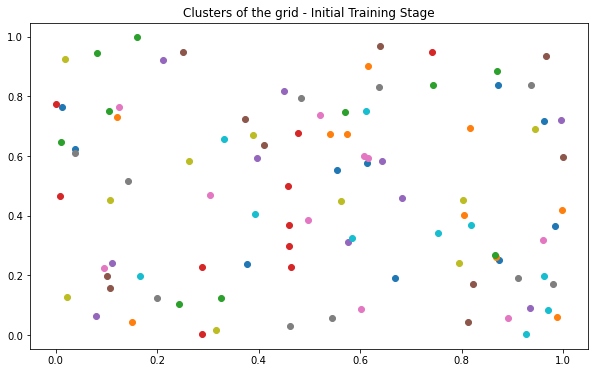

In [8]:
plt.figure(figsize=(10,6))
for i in range(initial_value.shape[0]):
    plt.scatter(initial_value[i,:,0],initial_value[i,:,1])
plt.title('Clusters of the grid - Initial Training Stage')
plt.show()

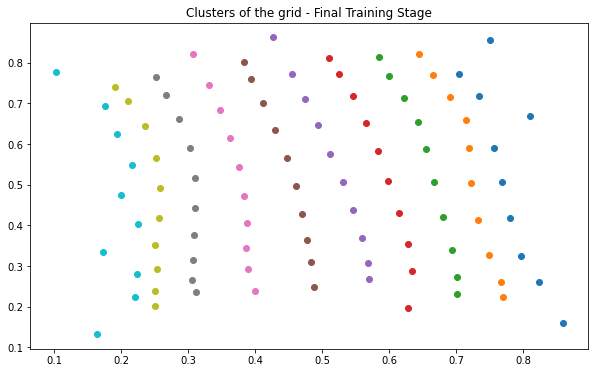

In [9]:
plt.figure(figsize=(10,6))
for i in range(final_train_output.shape[0]):
    plt.scatter(final_train_output[i,:,0],final_train_output[i,:,1])
plt.title('Clusters of the grid - Final Training Stage')
plt.show()

In [10]:
training_error = error.copy()

# Testing

In [11]:
test_output = []
model2= ksom(10,10,df_test,L0=0.8,lam=1e2,sigma0=20,frames=test_output)

Final t: 530
Error:  0.04610157572257312
Error:  0.06212944272810681
Error:  0.05382297426726759
Error:  0.05288029425549027
Error:  0.06766730205474161
Error:  0.08736762871027166
Error:  0.07765412491969541
Error:  0.07402342316165553
Error:  0.06866655175550923
Error:  0.0701839740028154
Error:  0.07663768493909705
Error:  0.07553533482915582
Error:  0.07800325936963409
Error:  0.0736549054370812
Error:  0.07157430613851644
Error:  0.06951133358979998
Error:  0.07245912737666688
Error:  0.0777321029949749
Error:  0.0746407776945365
Error:  0.0770996206332461
Error:  0.07583772137294358
Error:  0.07304864716586226
Error:  0.0736671214909239
Error:  0.07195821090810223
Error:  0.07052127787536358
Error:  0.07104097830660608
Error:  0.06933932643891756
Error:  0.06829753147504065
Error:  0.06667509320426657
Error:  0.06566314007181047
Error:  0.06384645293526908
Error:  0.06639451653847304
Error:  0.06597518052499196
Error:  0.06493066029614261
Error:  0.06604293872157417
Error:  0.064

Error:  0.0675551380634162
Error:  0.06745238438381083
Error:  0.0675831888463929
Error:  0.06743556486055886
Error:  0.06734257393919175
Error:  0.06729512748460406
Error:  0.06732588272644291
Error:  0.06728321191843639
Error:  0.06716654253261928
Error:  0.0671379578999107
Error:  0.06703370455469719
Error:  0.06716730411438375
Error:  0.06732561478814982
Error:  0.06742869420456725
Error:  0.06731058260725035
Error:  0.06723822121327114
Error:  0.06746760344232544
Error:  0.06734223974086649
Error:  0.0672887025016892
Error:  0.06723411809621395
Error:  0.06715670286334975
Error:  0.06708186114827089
Error:  0.0669901342079177
Error:  0.06700266923630907
Error:  0.06726639619655418
Error:  0.0672029377875276
Error:  0.06709302741225173
Error:  0.06698038947632266
Error:  0.06686785917484574
Error:  0.06680914385917033
Error:  0.06680261502884559
Error:  0.06694380195374529
Error:  0.06687574974970713
Error:  0.06710166211030316
Error:  0.06718198535256167
Error:  0.0671204427936374

In [12]:
initial_test_value = test_output[0]
final_test_output = test_output[-1]

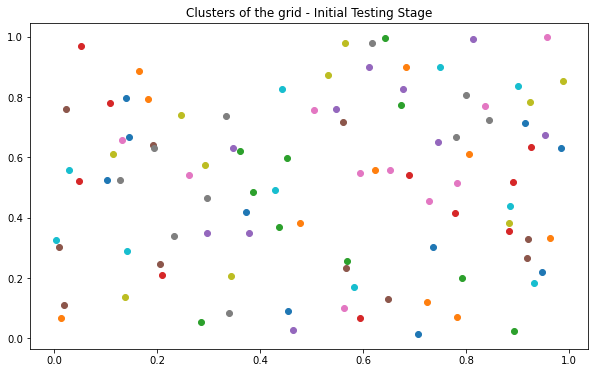

In [13]:
plt.figure(figsize=(10,6))
for i in range(initial_test_value.shape[0]):
    plt.scatter(initial_test_value[i,:,0],initial_test_value[i,:,1])
plt.title('Clusters of the grid - Initial Testing Stage')
plt.show()

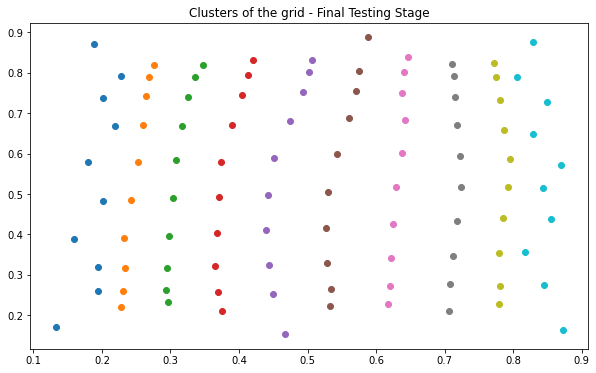

In [14]:
plt.figure(figsize=(10,6))
for i in range(final_test_output.shape[0]):
    plt.scatter(final_test_output[i,:,0],final_test_output[i,:,1])
plt.title('Clusters of the grid - Final Testing Stage')
plt.show()

In [15]:
testing_error = error.copy()

# Visualization

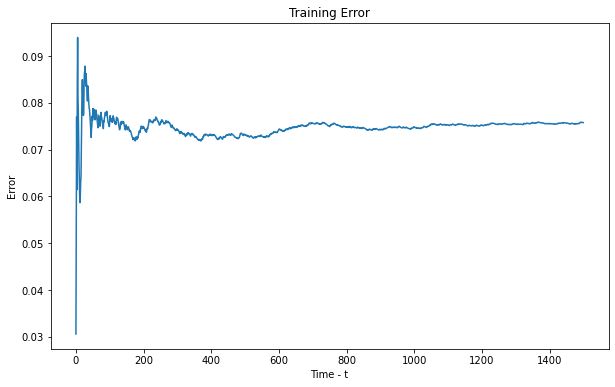

In [16]:
plt.figure(figsize=(10,6))
plt.title('Training Error')
plt.xlabel("Time - t")
plt.ylabel('Error')
plt.plot(training_error)
plt.show()

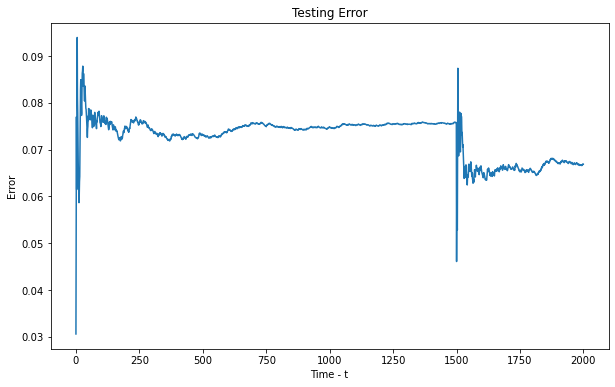

In [17]:
plt.figure(figsize=(10,6))
plt.title('Testing Error')
plt.xlabel("Time - t")
plt.ylabel('Error')
plt.plot(testing_error)
plt.show()